<a href="https://colab.research.google.com/github/AdrianGabryla/MachineLearning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import random

#define Unit Step Function
def unitStep(v):
  if v >= 0:
    return 1
  else:
    return 0

#design Perceptron Model
def perceptronModel(x,w,b):
  v= np.dot(w,x)+b
  y= unitStep(v)
  return y

In [7]:
init_w = [random.random(), random.random()]

Disjunction (or) A v B

In [10]:
lr=0.1
epochs=10
weights=init_w
b=-1


for epoch in range(epochs):
  error_sum=0
  for x in augmented_X:
    y= perceptronModel(x[:-1],weights,-1)
    error= x[-1]-y
    error_sum += np.abs(error)
    new_weights = []
    for i in range(len(weights)): #update weights
      new_weight = weights[i] + lr * error * x[i]
      new_weights.append(new_weight)
    weights = (new_weights)
  print(error_sum)

2
2
0
0
0
0
0
0
0
0


In [11]:
def decision_boundary(x,weights):
  #w1*x1 + w2*x2 -1 = 0
  #x2 = 1/w2 - (w1/w2) *x1
  y = 1/weights[1] - (weights[0]/weights[1])*x
  return y

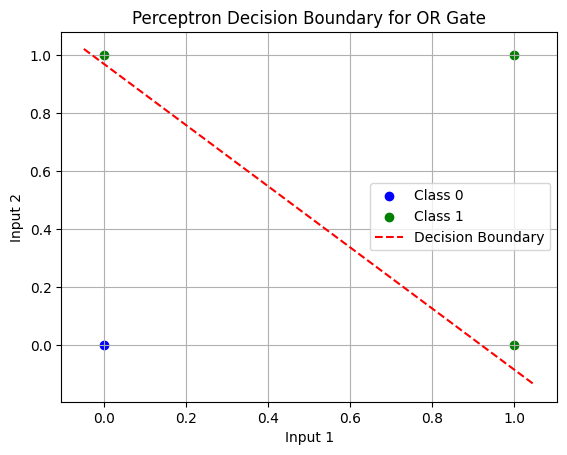

In [13]:
import matplotlib.pyplot as plt

x_interval = np.linspace(-0.05, 1.05, 150)
y = decision_boundary(x_interval, weights)

# Extract X (input features) and y_true (target outputs) from augmented_X
X = np.array([item[:-1] for item in augmented_X])
y_true = np.array([item[-1] for item in augmented_X])

# Plot the data points
for i in range(len(X)):
    if y_true[i] == 0:
        plt.scatter(X[i][0], X[i][1], color="blue", label="Class 0" if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color="green", label="Class 1" if i == 1 else "")

# Plot the decision boundary
plt.plot(x_interval, y, 'r--', label="Decision Boundary")

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Perceptron Decision Boundary for OR Gate")
plt.legend()
plt.grid(True)
plt.show()